In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

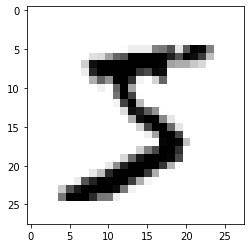

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images[0]

In [ ]:
print(train_labels.shape)
train_labels

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

# Example 1: MNIST using ANN

In [7]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, activation ='relu'))
network.add(layers.Dense(32, activation ='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

In [9]:
#preprocessing
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
network.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3277 - acc: 0.9031
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1314 - acc: 0.9603
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0916 - acc: 0.9725
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - acc: 0.9785
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0575 - acc: 0.9820


In [11]:
test_loss, test_acc = network.evaluate(x_test, y_test, verbose=2)
print('test_acc:', test_acc)

313/313 - 0s - loss: 0.0843 - acc: 0.9762 - 348ms/epoch - 1ms/step
test_acc: 0.9761999845504761


# Example 2: MINIST using CNN

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [15]:
x_train = train_images.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 31s 33ms/step - loss: 0.1743 - acc: 0.9452
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0460 - acc: 0.9858
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0309 - acc: 0.9910
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0243 - acc: 0.9926
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0189 - acc: 0.9944


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('test_acc:', test_acc)

313/313 - 2s - loss: 0.0249 - acc: 0.9927 - 2s/epoch - 6ms/step
test_acc: 0.9926999807357788
